In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

### Section 1: Learning the data structure

In [66]:
inequality = pd.read_csv('../data/raw/WID_Data_Metadata/WID_Data_09122023-213552.csv',  delimiter=';')
inequality.head()

Downloaded from wid.world on 09-12-2023 at 21:35:52
Percentile Year sptinc_z_CH\nPre-tax national income \nTop 10% ... sptinc_z_US-NV\nPre-tax national income \nTop 1... sptinc_z_QM\nPre-tax national income \nTop 10% ... sptinc_z_UY\nPre-tax national income \nTop 10% ... sptinc_z_SY\nPre-tax national income \nTop 10% ... sptinc_z_GN\nPre-tax national income \nTop 10% ... sptinc_z_OE-MER\nPre-tax national income \nTop ... sptinc_z_MW\nPre-tax national income \nTop 10% ... sptinc_z_MN\nPre-tax national income \nTop 10% ... sptinc_z_US-OR\nPre-tax national income \nTop 1... sptinc_z_US-CT\nPre-tax national income \nTop 1... sptinc_z_SK\nPre-tax national income \nTop 10% ... sptinc_z_QT\nPre-tax national income \nTop 10% ... sptinc_z_ZM\nPre-tax national income \nTop 10% ... sptinc_z_ER\nPre-tax national income \nTop 10% ... sptinc_z_KE\nPre-tax national income \nTop 10% ... sptinc_z_IE\nPre-tax national income \nTop 10% ... sptinc_z_PA\nPre-tax national income \nTop 10% ... sptinc_z_GT\nPre-tax national income \nTop 10% ... sptinc_z_US-NE\nPre-tax national income \nTop 1... sptinc_z_AE\nPre-tax national income \nTop 10% ... sptinc_z_QF\nPre-tax national income \nTop 10% ... sptinc_z_ST\nPre-tax national income \nTop 10% ... sptinc_z_QD-MER\nPre-tax national income \nTop ... sptinc_z_US-MD\nPre-tax national income \nTop 1... sptinc_z_US-VT\nPre-tax national income \nTop 1... sptinc_z_OJ-MER\nPre-tax national income \nTop ... sptinc_z_US-MO\nPre-tax national income \nTop 1... sptinc_z_LT\nPre-tax national income \nTop 10% ... sptinc_z_DE\nPre-tax national income \nTop 10% ... sptinc_z_JP\nPre-tax national income \nTop 10% ... sptinc_z_GR\nPre-tax national income \nTop 10% ... sptinc_z_QS-MER\nPre-tax national income \nTop ... sptinc_z_US-SD\nPre-tax national income \nTop 1... sptinc_z_MZ\nPre-tax national income \nTop 10% ... sptinc_z_TJ\nPre-tax national income \nTop 10% ... sptinc_z_US-IN\nPre-tax national income \nTop 1... sptinc_z_NG\nPre-tax national income \nTop 10% ... sptinc_z_OC-MER\nPre-tax national income \nTop ... sptinc_z_CN\nPre-tax national income \nTop 10% ... sptinc_z_ET\nPre-tax national income \nTop 10% ... sptinc_z_JO\nPre-tax national income \nTop 10% ... sptinc_z_KR\nPre-tax national income \nTop 10% ... sptinc_z_BS\nPre-tax national income \nTop 10% ... sptinc_z_SV\nPre-tax national income \nTop 10% ... sptinc_z_CI\nPre-tax national income \nTop 10% ... sptinc_z_NA\nPre-tax national income \nTop 10% ... sptinc_z_US-KY\nPre-tax national income \nTop 1... sptinc_z_SS\nPre-tax national income \nTop 10% ... sptinc_z_KH\nPre-tax national income \nTop 10% ... sptinc_z_DE-HE\nPre-tax national income \nTop 1... sptinc_z_MT\nPre-tax national income \nTop 10% ... sptinc_z_MR\nPre-tax national income \nTop 10% ... sptinc_z_RU\nPre-tax national income \nTop 10% ... sptinc_z_QY\nPre-tax national income \nTop 10% ... sptinc_z_US-ME\nPre-tax national income \nTop 1... sptinc_z_US-PA\nPre-tax national income \nTop 1... sptinc_z_MU\nPre-tax national income \nTop 10% ... sptinc_z_US-AK\nPre-tax national income \nTop 1... sptinc_z_QN-MER\nPre-tax national income \nTop ... sptinc_z_BG\nPre-tax national income \nTop 10% ... sptinc_z_US-IA\nPre-tax national income \nTop 1... sptinc_z_QX-MER\nPre-tax national income \nTop ... sptinc_z_XL\nPre-tax national income \nTop 10% ... sptinc_z_DE-WU\nPre-tax national income \nTop 1... sptinc_z_PS\nPre-tax national income \nTop 10% ... sptinc_z_HU\nPre-tax national income \nTop 10% ... sptinc_z_QX\nPre-tax national income \nTop 10% ... sptinc_z_US-RI\nPre-tax national income \nTop 1... sptinc_z_CN-UR\nPre-tax national income \nTop 1... sptinc_z_LS\nPre-tax national income \nTop 10% ... sptinc_z_OD-MER\nPre-tax national income \nTop ... sptinc_z_BO\nPre-tax national income \nTop 10% ... sptinc_z_SR\nPre-tax national income \nTop 10% ... sptinc_z_UZ\nPre-tax national income \nTop 10% ... sptinc_z_LB\nPre-tax national income \nTop 10% ... sptinc_z_BA\nPre-tax national income \nTop 10% ... sptin

In [68]:
inequality_metadata = pd.read_csv('../data/raw/WID_Data_Metadata/WID_Metadata_09122023-213552.csv', delimiter=';')

### Manually extracting data

In [73]:
andora = pd.read_csv('../data/raw/wid_all_data/WID_data_AD.csv', delimiter=';')
andora_metadata = pd.read_csv('../data/raw/wid_all_data/WID_metadata_AD.csv', delimiter=';')

In [48]:
andora[andora.variable=='mhweali999']

,country,variable,percentile,year,value,age,pop
1845,AD,mhweali999,p0p100,1995,4.680451e+08,999,i
1846,AD,mhweali999,p0p100,1996,5.633372e+08,999,i
1847,AD,mhweali999,p0p100,1997,6.966949e+08,999,i
1848,AD,mhweali999,p0p100,1998,7.992695e+08,999,i
1849,AD,mhweali999,p0p100,1999,9.133876e+08,999,i
1850,AD,mhweali999,p0p100,2000,1.034417e+09,999,i
1851,AD,mhweali999,p0p100,2001,1.218508e+09,999,i
1852,AD,mhweali999,p0p100,2002,1.376248e+09,999,i
1853,AD,mhweali999,p0p100,2003,1.626422e+09,999,i
1854,AD,mhweali999,p0p100,2004,1.909609e+09,999,i


In [51]:
# 999 is the code for all individuals in population
# 992 is all adults
variables = andora_metadata[(andora_metadata.shortname=='Gross domestic product') | (andora_metadata.shortname=='Population')]
target_variables = variables[(variables.age==999) & (~variables.shorttype.str.contains('Average')) & (variables.shortpop=='individuals')]

In [54]:
andora_data = andora.merge(target_variables, on='variable', how='inner')
andora_gdp = andora_data[andora_data.shortname=='Gross domestic product']
andora_pop = andora_data[andora_data.shortname=='Population']

Text(0, 0.5, 'GDP (Euros)')

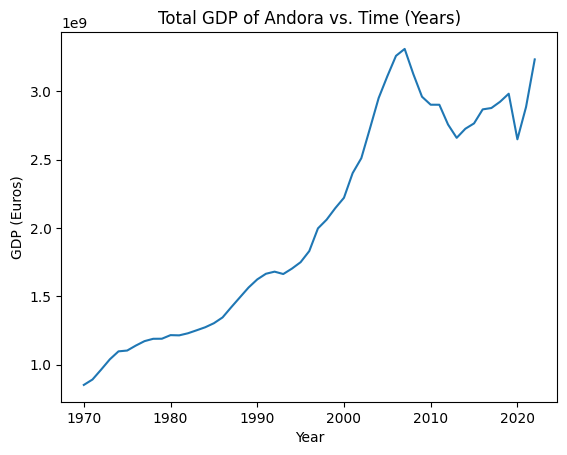

In [55]:
plt.plot(andora_gdp.year, andora_gdp.value)
plt.title('Total GDP of Andora vs. Time (Years)')
plt.xlabel('Year')
plt.ylabel('GDP (Euros)')

Text(0, 0.5, 'Population')

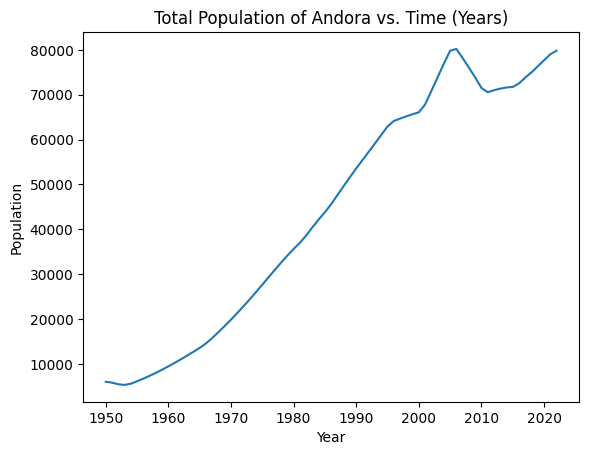

In [56]:
plt.plot(andora_pop.year, andora_pop.value)
plt.title('Total Population of Andora vs. Time (Years)')
plt.xlabel('Year')
plt.ylabel('Population')

### Section 2: Extracting data for all countries

In [3]:
# Get files in directory
file_paths = os.listdir('../data/raw/wid_all_data/')
# Filter out raw data files using regex
regex = re.compile('WID_data_.*')
data_file_paths = list(filter(regex.match, file_paths))

In [347]:
# Extract Data from raw files. 
df_dict = {}
folder_path = '../data/raw/wid_all_data/'
for f in data_file_paths:
    # Get relative file paths
    f = os.path.join(folder_path, f)
    metadata_path = re.sub('_data_', '_metadata_', f)
    data = pd.read_csv(f, delimiter=';')
    # Check if csv is empty, if so skip processing
    if len(data) > 1:
        # Extract country name for dictionary Key
        country = data.country.iloc[0]
        # Filter for only relevant percentiles
        data = data[(data.percentile == "p90p100") | (data.percentile == "p0p50") | (data.percentile == "p0p100")]
        # Load metadata file
        metadata = pd.read_csv(metadata_path, delimiter=';')
        # Filter for Net personal wealth
        npw_varname = metadata[(metadata.shortname=='Net personal wealth')]
        # Join dataframes
        npw = data.merge(npw_varname, on='variable', how='inner')
        # Add to dictionary
        df_dict[country] = npw
    
    

In [83]:
# Create a new dictionary of only dataframes that are not empty
df_dict_cleaned = {k: v for k, v in df_dict.items() if not v.empty}

In [228]:
# Create dataframes containing variable of interest: Ratio of wealth owned by top 10% vs bottom 50%
df_list = []
avg_inequalities = {}
for k, v in df_dict_cleaned.items():
    # Create separate dataframes for bottom 50% and top 10%
    v_50 = v[(v.percentile=="p0p50") & (v.shorttype=='Average') & (v.age_x==992) & (v.value > 0)]
    v_90 = v[(v.percentile=="p90p100") & (v.shorttype=='Average') & (v.age_x==992) & (v.value > 0)]
    # Merge dataframes
    merged = v_50[['countryname', 'year', 'value']].merge(v_90[['countryname', 'year', 'value']], on=['year', 'countryname'], suffixes=('_50', '_90'), how='inner')
    # Calculate ratio values
    merged['inequality'] = merged.value_90/merged.value_50
    # Append to list for easy concatenation
    df_list.append(merged)
    avg_inequalities[k] = merged.inequality.mean()
    
    

In [272]:
happiness.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


/var/folders/gy/t4p4839s5gz6x16gqx_h_k300000gn/T/ipykernel_8169/3436288865.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  inequality_df = inequality_df[~inequality_df.countryname.str.contains('(at market exchange rate)')]


Text(0, 0.5, 'Log Wealth Inequality Ratio')

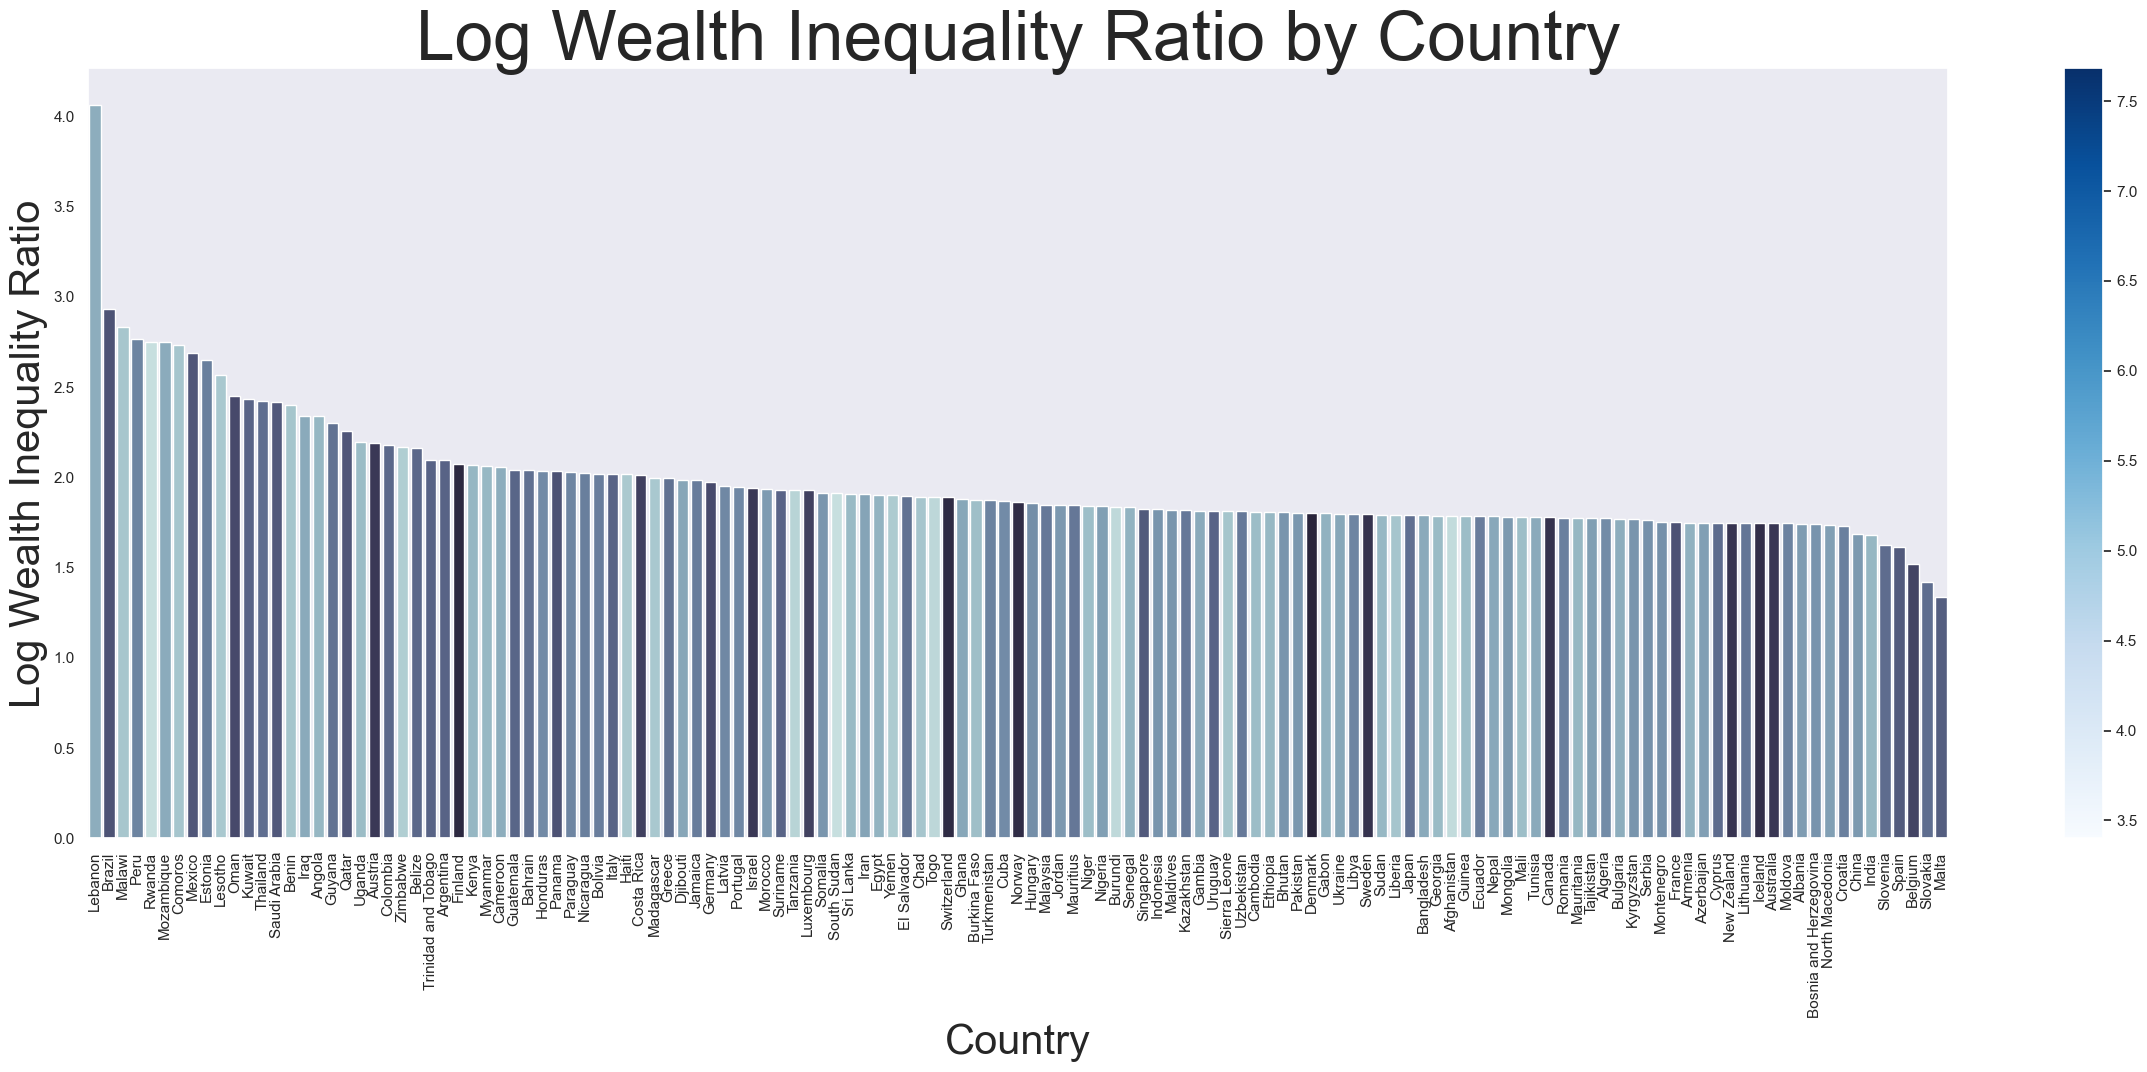

In [409]:
# Set Seaborne color palette
palette = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

sns.set(rc={'figure.figsize':(30,10)})

# Dataframe groupby operations
inequality_df = pd.concat(df_list)
inequality_df = inequality_df[~inequality_df.countryname.str.contains('(at market exchange rate)')]
happiness = pd.read_csv('../data/raw/WHR2023Table.csv')
merged_happiness = happiness.merge(inequality_df[['countryname', 'year', 'inequality']], how='inner', left_on=['Country name', 'year'], right_on=['countryname', 'year']).drop(columns='countryname')
grouped_country = merged_happiness[['Country name', 'year', 'inequality', 'Life Ladder']].groupby(by=['Country name']).mean().sort_values(by='inequality', ascending=False)
# Take log of values due to large x-range
grouped_country['log inequality'] = np.log10(grouped_country.inequality)

# Plot values
ax = sns.barplot(data=grouped_country, x='Country name', y='log inequality', hue='Life Ladder', palette=palette, legend=None)
ax.tick_params(axis='x', rotation=90)
ax.grid(False)
ax.set(xlabel='Country', ylabel='Log Wealth Inequality Ratio', title='Log Wealth Inequality Ratio by Country')

# Format Plot
norm = plt.Normalize(grouped_country['Life Ladder'].min(), grouped_country['Life Ladder'].max())
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
ax.figure.colorbar(sm, ax=ax)
ax.axes.set_title("Log Wealth Inequality Ratio by Country",fontsize=50)
ax.axes.set_xlabel("Country",fontsize=30)
ax.axes.set_ylabel("Log Wealth Inequality Ratio",fontsize=30)

In [303]:
inequality_df = pd.concat(df_list)
inequality_df = inequality_df[~inequality_df.countryname.str.contains('(at market exchange rate)')]
inequality_df.to_csv("../data/processed/world_wealth_inequality.csv")

/var/folders/gy/t4p4839s5gz6x16gqx_h_k300000gn/T/ipykernel_8169/1576722366.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  inequality_df = inequality_df[~inequality_df.countryname.str.contains('(at market exchange rate)')]


In [346]:
inequality_df.head(5)

,value_50,countryname,year,value_90,inequality
0,250.8,Latin America,1995,122582.5,488.765949
1,183.2,Latin America,1996,128047.2,698.947598
2,202.2,Latin America,1997,135813.5,671.679031
3,218.4,Latin America,1998,139778.7,640.012363
4,217.7,Latin America,1999,141444.7,649.723013


In [233]:
happiness = pd.read_csv('../data/raw/WHR2023Table.csv')
merged_happiness = happiness.merge(inequality_df[['countryname', 'year', 'inequality']], how='inner', left_on=['Country name', 'year'], right_on=['countryname', 'year']).drop(columns='countryname')

In [345]:
merged_happiness.sort_values('inequality', ascending=False).head(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,inequality
863,Lebanon,2011,5.188,9.864,0.733,65.460,0.657,0.000,0.911,0.506,0.320,94963.853630
865,Lebanon,2015,5.172,9.718,0.742,65.700,0.597,0.068,0.889,0.524,0.243,8358.925622
864,Lebanon,2014,5.233,9.733,0.759,65.640,0.657,-0.015,0.939,0.525,0.267,7993.108802
860,Lebanon,2008,4.595,9.712,0.717,65.280,0.524,0.033,0.927,0.475,0.365,7128.508873
866,Lebanon,2016,5.271,9.755,0.828,65.775,0.657,0.023,0.853,0.513,0.263,6768.060767


In [236]:
merged_happiness.inequality.mean()

204.6005746512259

In [399]:
merged_happiness['log_inequality'] = np.log10(merged_happiness['inequality'])

<Axes: xlabel='log_inequality', ylabel='Freedom to make life choices'>

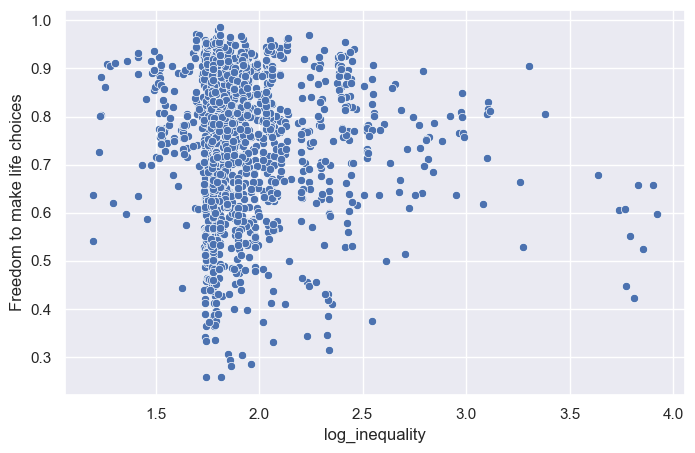

In [400]:
sns.scatterplot(data=merged_happiness[(merged_happiness.inequality <20000)], x="log_inequality", y='Freedom to make life choices')

<Axes: xlabel='inequality', ylabel='Life Ladder'>

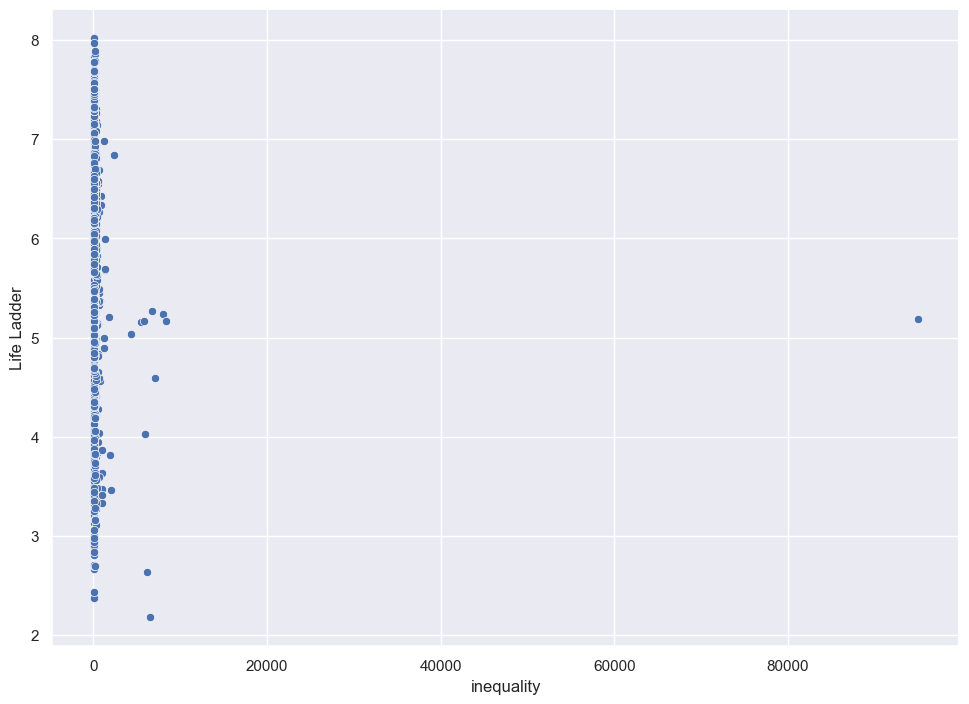

In [401]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=merged_happiness, x="inequality", y='Life Ladder')


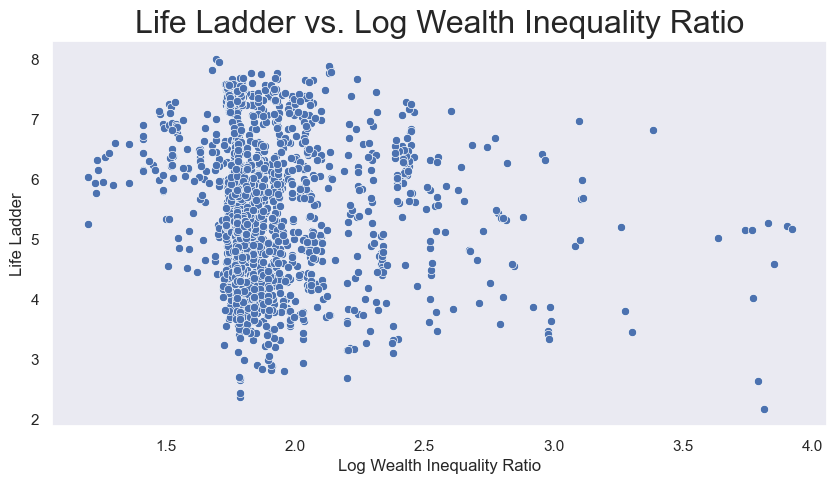

In [407]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.scatterplot(data=merged_happiness[(merged_happiness.inequality <20000)], x="log_inequality", y='Life Ladder')
ax.set(xlabel='Log Wealth Inequality Ratio', title='Life Ladder vs. Log Wealth Inequality Ratio')
ax.axes.set_title("Life Ladder vs. Log Wealth Inequality Ratio",fontsize=23)
ax.grid(False)

# def label_point(x, y, val, ax):
#     a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
#     for i, point in a.iterrows():
#         if point['val'] in ['United States', 'China', 'Russia', 'India', 'Mexico', 'Japan', 'France']:
#             ax.text(point['x']+.02, point['y'], str(point['val']))
# label_point(merged_happiness['Life Ladder'],merged_happiness['log_inequality'], merged_happiness['Country name'], ax)



<Axes: xlabel='inequality', ylabel='Life Ladder'>

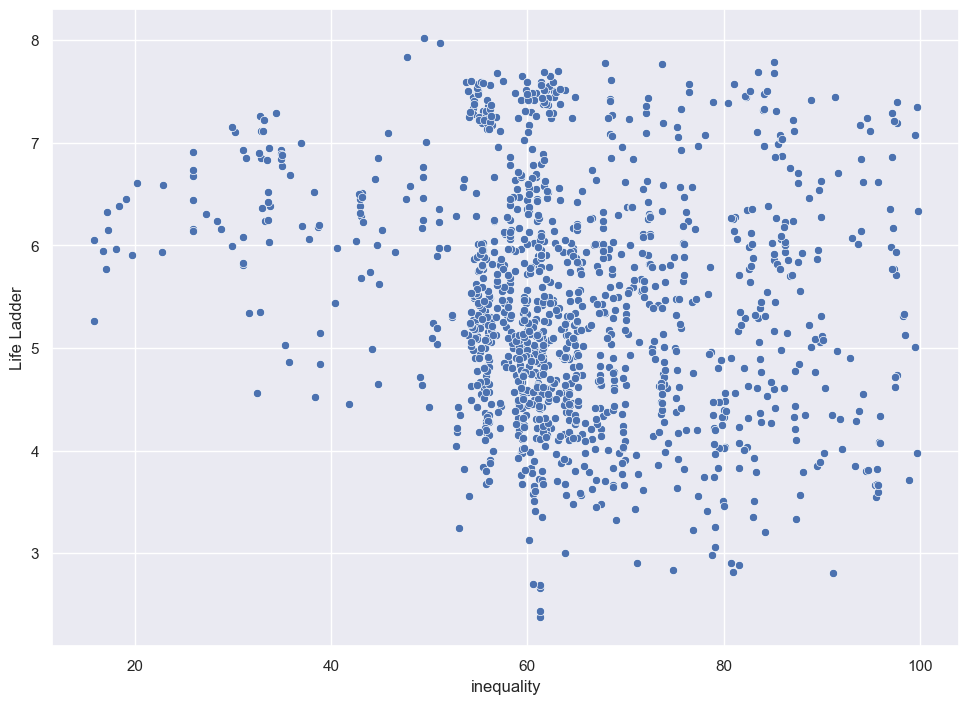

In [262]:
sns.scatterplot(data=merged_happiness[(merged_happiness.inequality < 100)], x="inequality", y='Life Ladder')

<Axes: xlabel='log_inequality', ylabel='Perceptions of corruption'>

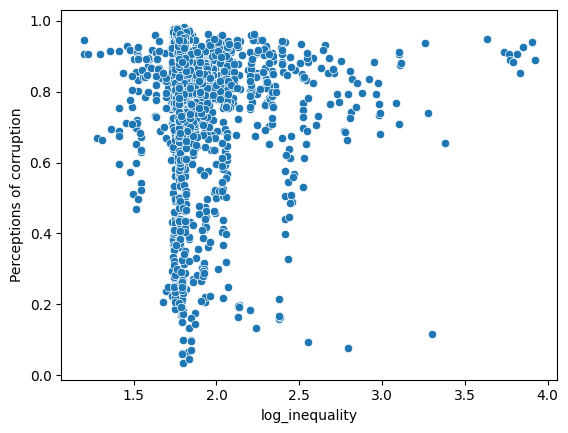

In [252]:
sns.scatterplot(data=merged_happiness[(merged_happiness.inequality <20000)], x="log_inequality", y='Perceptions of corruption')

<Axes: xlabel='log_inequality', ylabel='Healthy life expectancy at birth'>

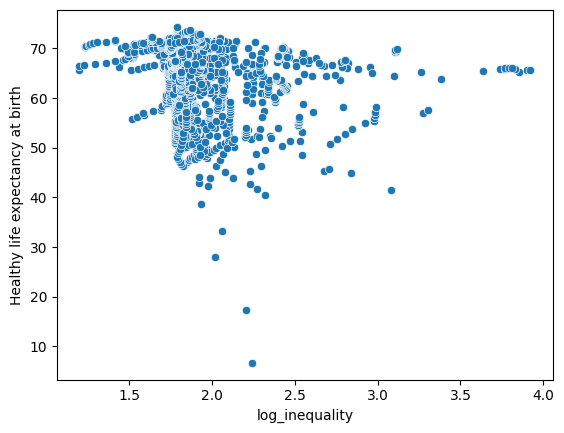

In [253]:
sns.scatterplot(data=merged_happiness[(merged_happiness.inequality <20000)], x="log_inequality", y='Healthy life expectancy at birth')

<Axes: xlabel='log_inequality', ylabel='Social support'>

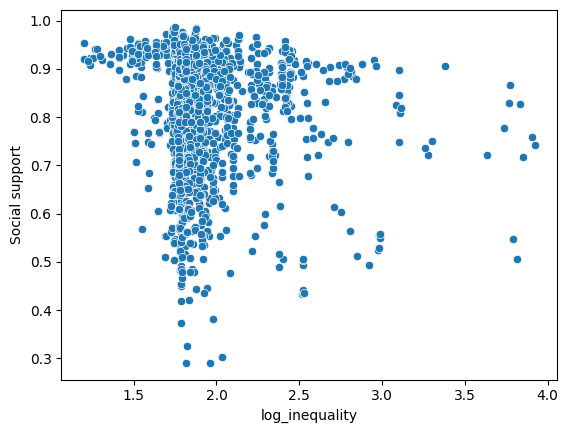

In [254]:
sns.scatterplot(data=merged_happiness[(merged_happiness.inequality <20000)], x="log_inequality", y='Social support')

### Section 3: Country Wealth vs Happiness

In [331]:
happiness2 = pd.read_csv('/Users/linaa/Github/Project2_Andrews_Lin_Manu/data/raw/WHR2023Figure.csv')

In [332]:
happiness2[happiness2['Country name']=='United States']

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
14,United States,6.894,0.047,6.986,6.802,11.048,0.919,65.85,0.8,0.137,0.689,1.778,1.98,1.46,0.39,0.557,0.21,0.172,2.124


0.7405956044133888 -1.4586814786632827 0.9999999999999998 0.0 1.5765334972598484e-09


Text(0, 0.5, 'Happiness Ladder Score')

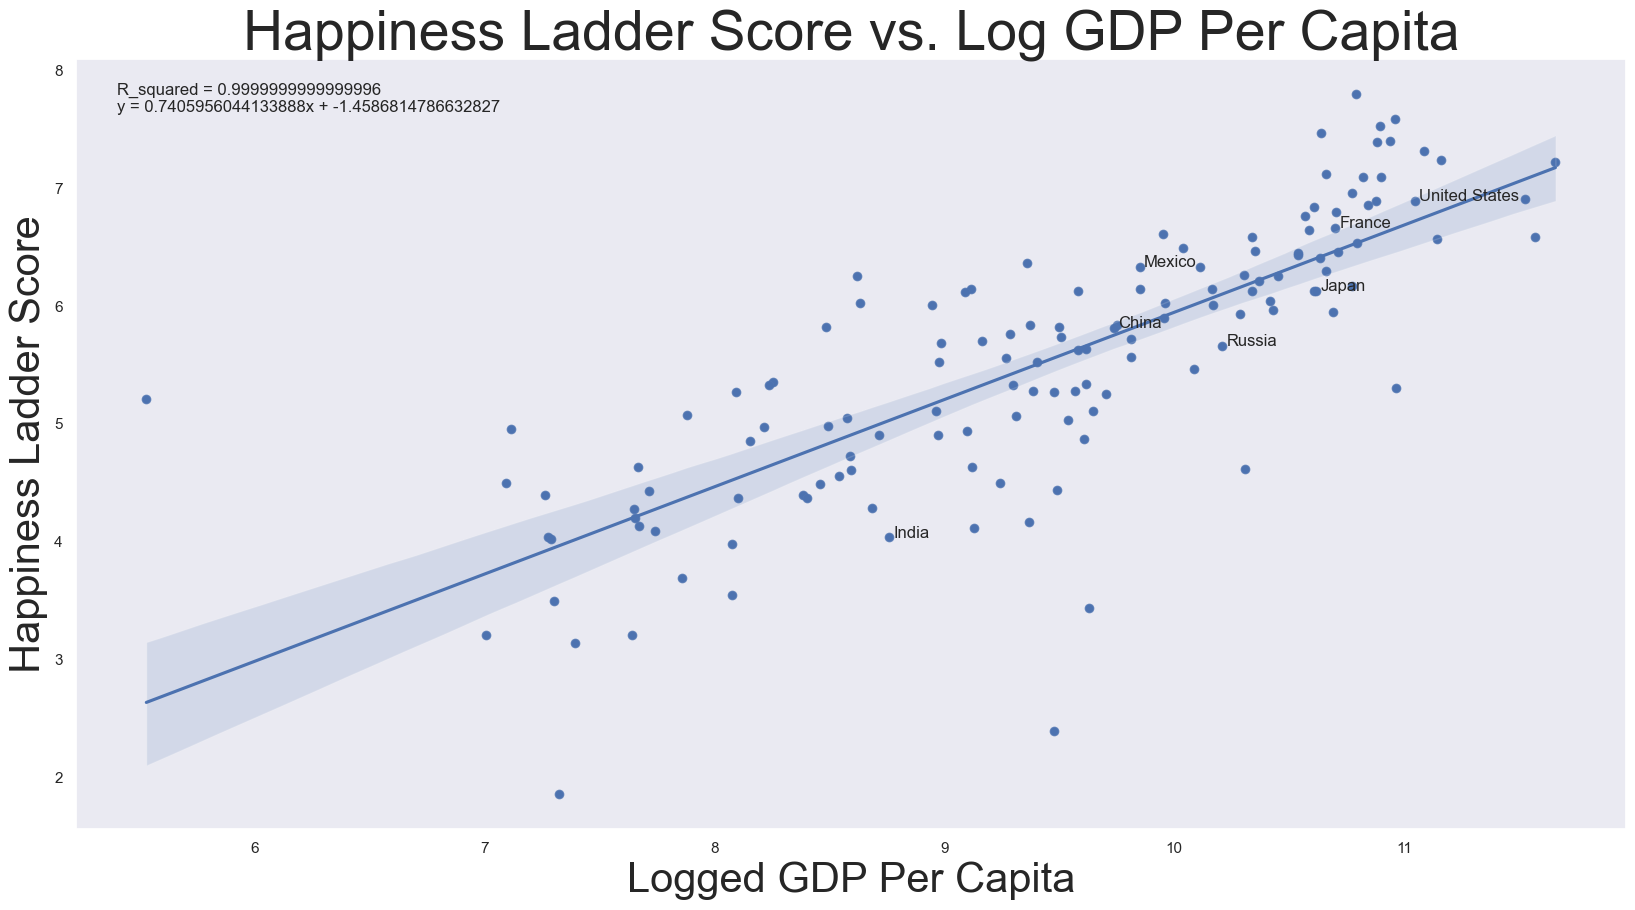

In [411]:
# Plot Happiness against Log GDP per Capita
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.scatterplot(happiness2, x='Logged GDP per capita', y='Ladder score')
ax2 = sns.regplot(happiness2, x = 'Logged GDP per capita', y = 'Ladder score')
ax.grid(False)
ax.set(title='Happiness Ladder Score vs. Log GDP Per Capita', ylabel='Happiness Ladder Score')

# Iterate through points in plot to identify countries to label
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['val'] in ['United States', 'China', 'Russia', 'India', 'Mexico', 'Japan', 'France']:
            ax.text(point['x']+.02, point['y'], str(point['val']))
label_point(happiness2['Logged GDP per capita'], happiness2['Ladder score'], happiness2['Country name'], ax)

# Perform regression analysis on this data
import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax2.get_lines()[0].get_xdata(),
                                                       y=ax2.get_lines()[0].get_ydata())
r_squared = r**2
print(slope, intercept, r, p, sterr)
ax.text(5.4, 7.8, f'R_squared = {r_squared}')
ax.text(5.4, 7.65, f'y = {slope}x + {intercept}')
ax.axes.set_title('Happiness Ladder Score vs. Log GDP Per Capita',fontsize=40)
ax.axes.set_xlabel("Logged GDP Per Capita",fontsize=30)
ax.axes.set_ylabel("Happiness Ladder Score",fontsize=30)